The dataset contains<br>
Train: 2,10, 240 x 19<br>
Test: 52,560 x 16<br>

The dataset contains measurements of various meteorological parameters over a period of time. The data columns and their respective units are as follows:<br>

- Timestamp: Date and time of measurement
- Temperature: Degrees Celsius (°C)
- Dew Point: Degrees Celsius (°C)
- Surface Albedo: Decimal fraction between 0 and 1
- Pressure: Hectopascals (hPa)
- Wind Direction: Degrees (°)
- Wind Speed: Meters per second (m/s)
- Clearsky DHI: Watts per square meter (W/m²)
- Clearsky DNI: Watts per square meter (W/m²)
- Clearsky GHI: Watts per square meter (W/m²)
- Fill Flag: Binary (0 or 1) indicating if data was missing or not
- Ozone: Dobson Units (DU)
- Cloud Type: Classification scheme (0-9) indicating cloud cover type
- Solar Zenith Angle: Degrees (°)
- Precipitable Water: Millimeters (mm)
- Relative Humidity: Percentage (%)

In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [4]:
from sklearn import tree

In [5]:
train_data_path = "C:\\Users\\Saranya.Sakkarapani\\solar_data\\train_data\\train.csv"
df_train_data = pd.read_csv(train_data_path)

In [6]:
test_data_path = "C:\\Users\\Saranya.Sakkarapani\\solar_data\\test_data\\test.csv"
df_test_data = pd.read_csv(test_data_path)

In [7]:
df_train_data.head()

Timestamp  Temperature  Dew Point  Surface Albedo  Pressure  \
0  2019-01-01 00:00:00         12.5        6.9            0.21      1005   
1  2019-01-01 00:10:00         12.3        6.9            0.21      1005   
2  2019-01-01 00:20:00         12.1        6.9            0.21      1005   
3  2019-01-01 00:30:00         12.0        6.9            0.21      1005   
4  2019-01-01 00:40:00         11.8        6.9            0.21      1005   

   Wind Direction  Wind Speed  Clearsky DHI  Clearsky DNI  Clearsky GHI  \
0             121         1.0             0             0             0   
1             122         1.0             0             0             0   
2             124         1.0             0             0             0   
3             125         1.0             0             0             0   
4             126         1.0             0             0             0   

   Fill Flag  Ozone  Cloud Type  Solar Zenith Angle  Precipitable Water  \
0          0  0.258           1              173.92                 1.4   
1          0  0.258           1              171.79                 1.3   
2          0  0.258           1              169.59                 1.3   
3          0  0.258           1              167.37                 1.3   
4          0  0.258           1              165.13                 1.3   

   Relative Humidity  
0              68.82  
1              69.73  
2              70.65  
3              71.11  
4              71.91

In [8]:
df_train_data['Cloud Type'].unique()

array([1, 4, 3, 0, 7, 8, 2, 6, 9], dtype=int64)

In [9]:
df_train_data.dtypes

Timestamp              object
Temperature           float64
Dew Point             float64
Surface Albedo        float64
Pressure                int64
Wind Direction          int64
Wind Speed            float64
Clearsky DHI            int64
Clearsky DNI            int64
Clearsky GHI            int64
Fill Flag               int64
Ozone                 float64
Cloud Type              int64
Solar Zenith Angle    float64
Precipitable Water    float64
Relative Humidity     float64
dtype: object

In [10]:
df_train_data['Timestamp'] = pd.to_datetime(df_train_data['Timestamp'], format='%Y-%m-%d %H:%M:%S')

In [11]:
df_train_data.dtypes

Timestamp             datetime64[ns]
Temperature                  float64
Dew Point                    float64
Surface Albedo               float64
Pressure                       int64
Wind Direction                 int64
Wind Speed                   float64
Clearsky DHI                   int64
Clearsky DNI                   int64
Clearsky GHI                   int64
Fill Flag                      int64
Ozone                        float64
Cloud Type                     int64
Solar Zenith Angle           float64
Precipitable Water           float64
Relative Humidity            float64
dtype: object

In [12]:
df_train_data.head()

Timestamp  Temperature  Dew Point  Surface Albedo  Pressure  \
0 2019-01-01 00:00:00         12.5        6.9            0.21      1005   
1 2019-01-01 00:10:00         12.3        6.9            0.21      1005   
2 2019-01-01 00:20:00         12.1        6.9            0.21      1005   
3 2019-01-01 00:30:00         12.0        6.9            0.21      1005   
4 2019-01-01 00:40:00         11.8        6.9            0.21      1005   

   Wind Direction  Wind Speed  Clearsky DHI  Clearsky DNI  Clearsky GHI  \
0             121         1.0             0             0             0   
1             122         1.0             0             0             0   
2             124         1.0             0             0             0   
3             125         1.0             0             0             0   
4             126         1.0             0             0             0   

   Fill Flag  Ozone  Cloud Type  Solar Zenith Angle  Precipitable Water  \
0          0  0.258           1              173.92                 1.4   
1          0  0.258           1              171.79                 1.3   
2          0  0.258           1              169.59                 1.3   
3          0  0.258           1              167.37                 1.3   
4          0  0.258           1              165.13                 1.3   

   Relative Humidity  
0              68.82  
1              69.73  
2              70.65  
3              71.11  
4              71.91

In [13]:
df_train_data.drop(['Fill Flag'], axis =1)

Timestamp  Temperature  Dew Point  Surface Albedo  Pressure  \
0      2019-01-01 00:00:00         12.5        6.9            0.21      1005   
1      2019-01-01 00:10:00         12.3        6.9            0.21      1005   
2      2019-01-01 00:20:00         12.1        6.9            0.21      1005   
3      2019-01-01 00:30:00         12.0        6.9            0.21      1005   
4      2019-01-01 00:40:00         11.8        6.9            0.21      1005   
...                    ...          ...        ...             ...       ...   
210235 2022-12-31 23:10:00          6.9        5.8            0.21      1009   
210236 2022-12-31 23:20:00          6.8        5.8            0.21      1009   
210237 2022-12-31 23:30:00          6.8        5.8            0.21      1009   
210238 2022-12-31 23:40:00          6.8        5.6            0.21      1009   
210239 2022-12-31 23:50:00          6.8        5.6            0.21      1009   

        Wind Direction  Wind Speed  Clearsky DHI  Clearsky DNI  Clearsky GHI  \
0                  121         1.0             0             0             0   
1                  122         1.0             0             0             0   
2                  124         1.0             0             0             0   
3                  125         1.0             0             0             0   
4                  126         1.0             0             0             0   
...                ...         ...           ...           ...           ...   
210235              54         1.2             0             0             0   
210236              54         1.2             0             0             0   
210237              55         1.1             0             0             0   
210238              55         1.1             0             0             0   
210239              56         1.1             0             0             0   

        Ozone  Cloud Type  Solar Zenith Angle  Precipitable Water  \
0       0.258           1              173.92                 1.4   
1       0.258           1              171.79                 1.3   
2       0.258           1              169.59                 1.3   
3       0.258           1              167.37                 1.3   
4       0.258           1              165.13                 1.3   
...       ...         ...                 ...                 ...   
210235  0.279           4              173.77                 1.8   
210236  0.279           7              175.77                 1.8   
210237  0.279           7              177.31                 1.8   
210238  0.279           7              177.36                 1.8   
210239  0.280           7              175.87                 1.8   

        Relative Humidity  
0                   68.82  
1                   69.73  
2                   70.65  
3                   71.11  
4                   71.91  
...                   ...  
210235              92.63  
210236              93.26  
210237              93.26  
210238              91.95  
210239              91.95  

[210240 rows x 15 columns]

In [14]:
df_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210240 entries, 0 to 210239
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Timestamp           210240 non-null  datetime64[ns]
 1   Temperature         210240 non-null  float64       
 2   Dew Point           210240 non-null  float64       
 3   Surface Albedo      210240 non-null  float64       
 4   Pressure            210240 non-null  int64         
 5   Wind Direction      210240 non-null  int64         
 6   Wind Speed          210240 non-null  float64       
 7   Clearsky DHI        210240 non-null  int64         
 8   Clearsky DNI        210240 non-null  int64         
 9   Clearsky GHI        210240 non-null  int64         
 10  Fill Flag           210240 non-null  int64         
 11  Ozone               210240 non-null  float64       
 12  Cloud Type          210240 non-null  int64         
 13  Solar Zenith Angle  210240 no

In [15]:
df_train_data.isnull().sum()

Timestamp             0
Temperature           0
Dew Point             0
Surface Albedo        0
Pressure              0
Wind Direction        0
Wind Speed            0
Clearsky DHI          0
Clearsky DNI          0
Clearsky GHI          0
Fill Flag             0
Ozone                 0
Cloud Type            0
Solar Zenith Angle    0
Precipitable Water    0
Relative Humidity     0
dtype: int64

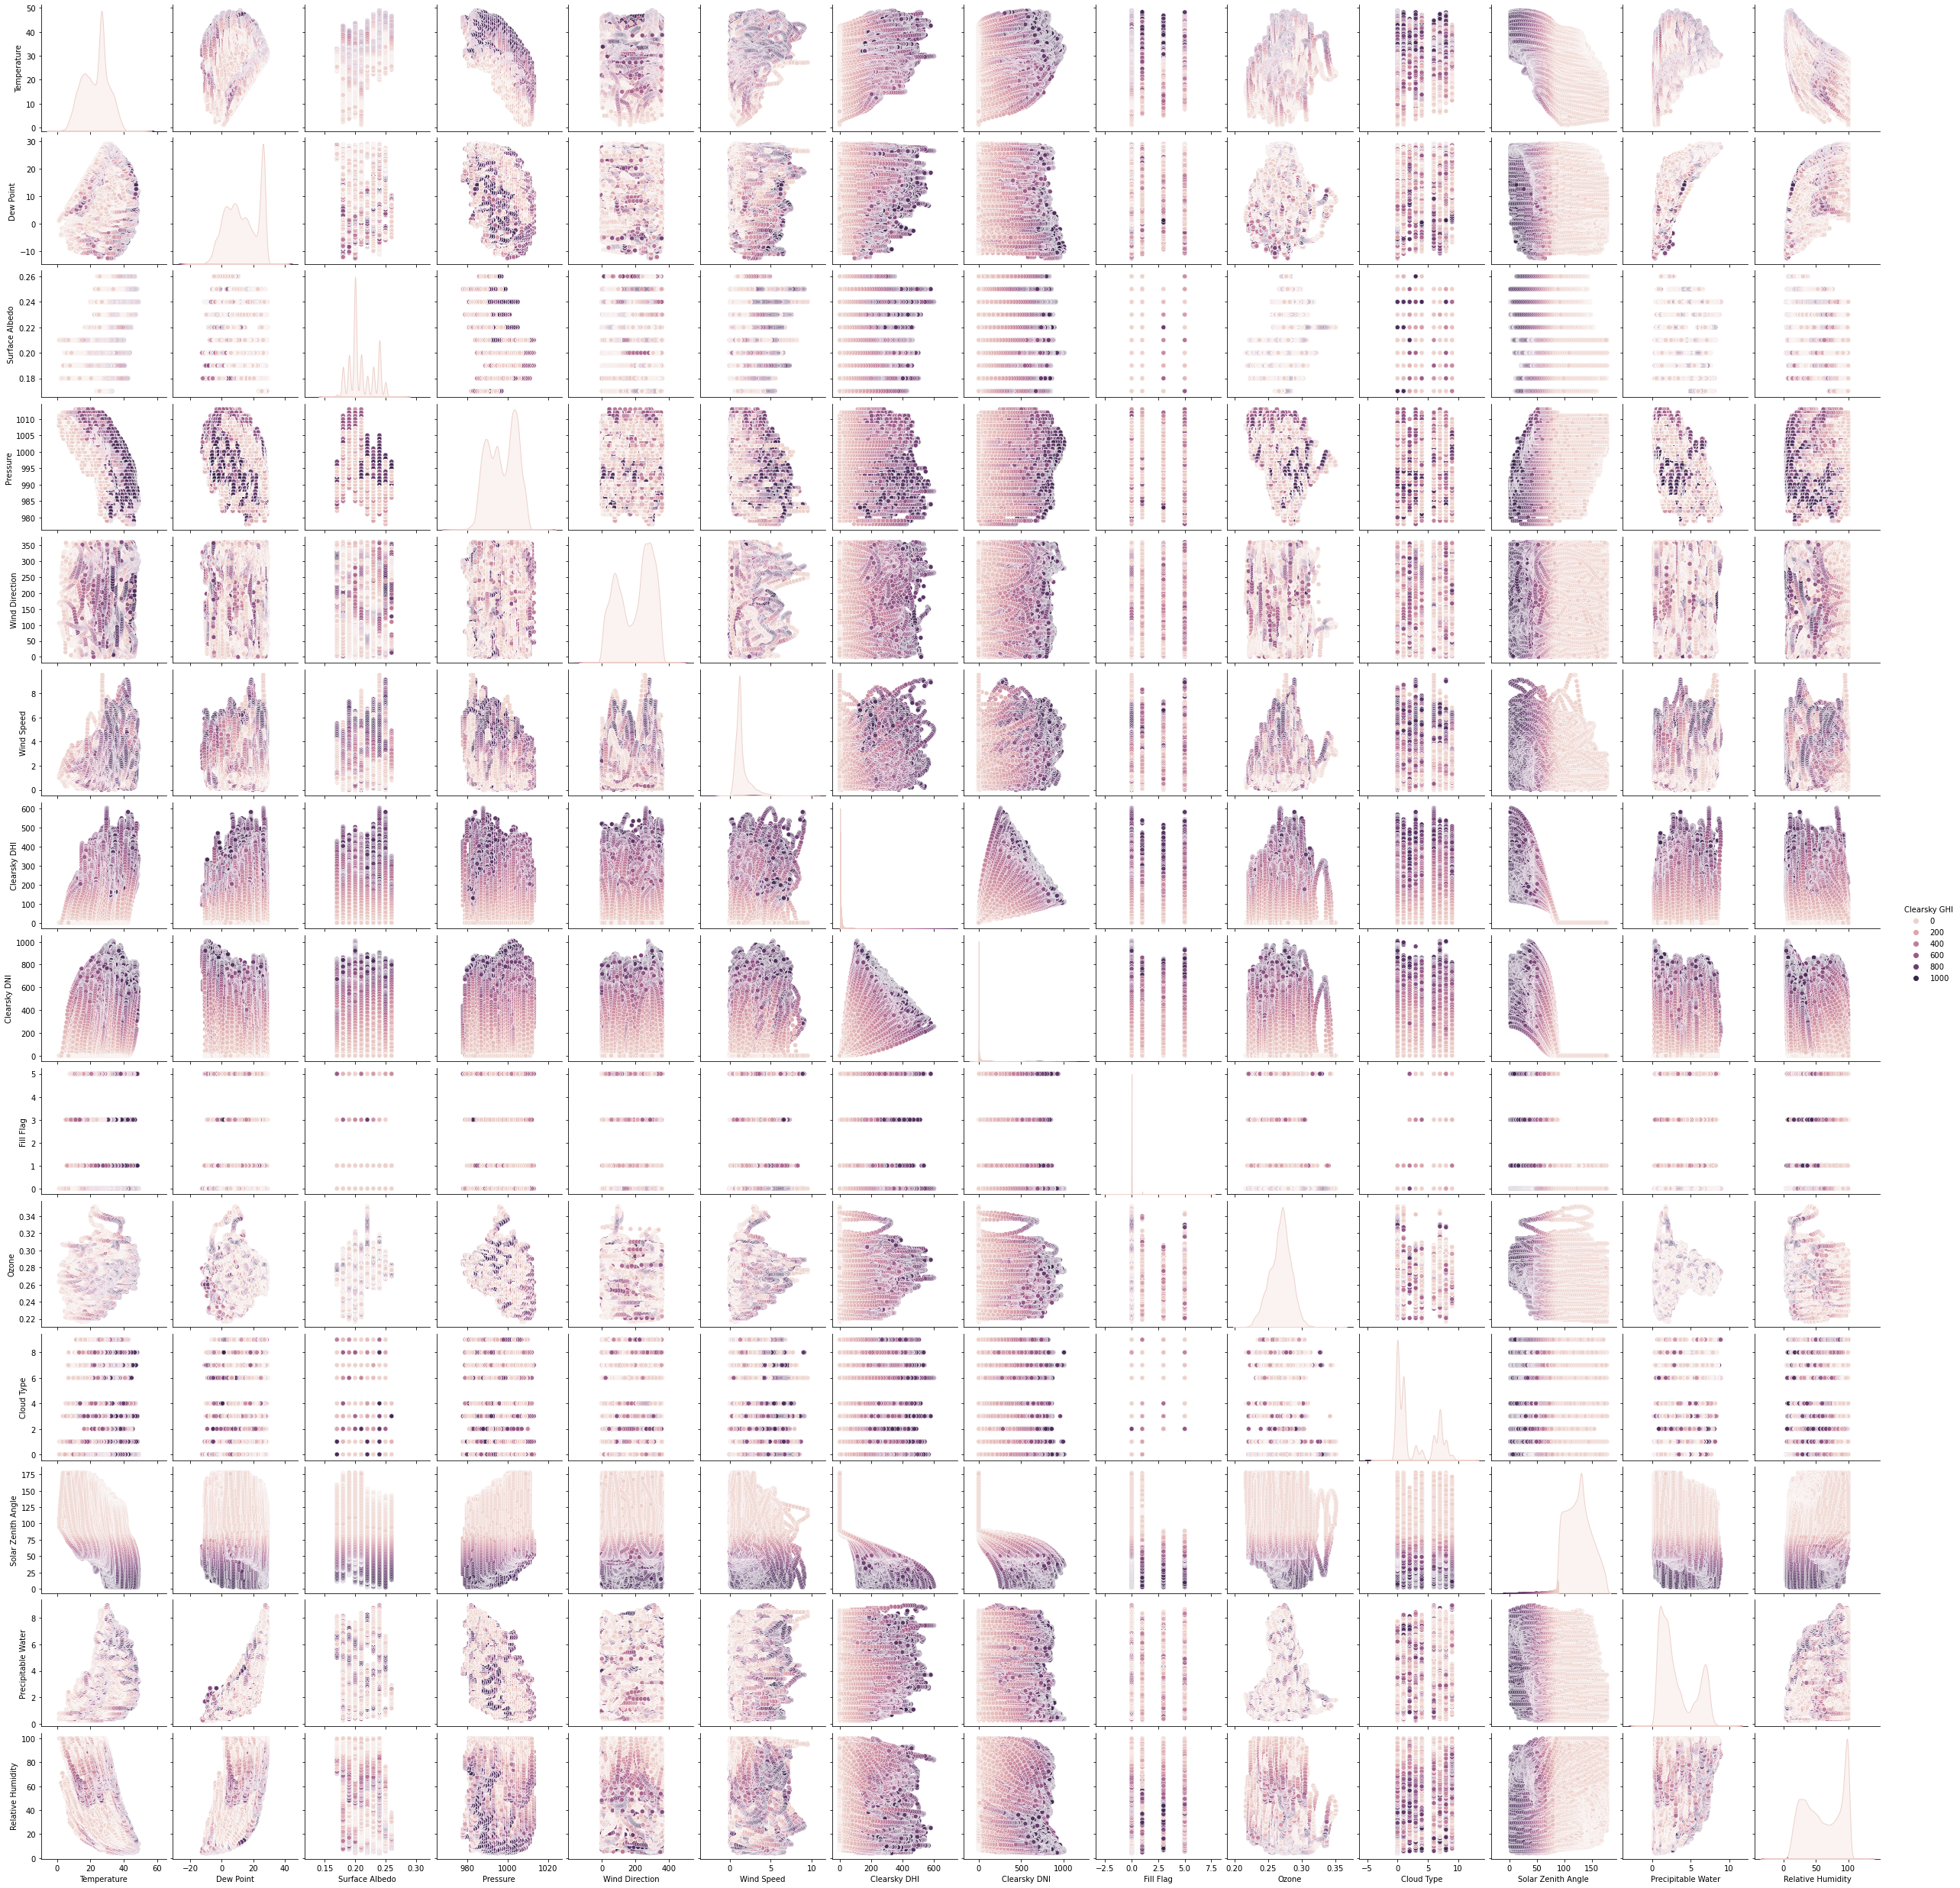

In [41]:
sns.pairplot(df_train_data, hue ='Clearsky GHI')

In [44]:
import seaborn as sns

KeyboardInterrupt: 

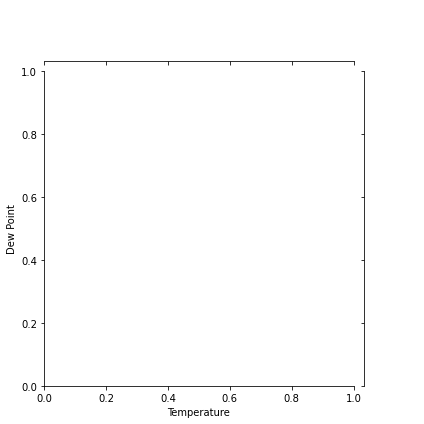

In [32]:
sns.jointplot(x= 'Temperature', y ='Dew Point', data = df_train_data, kind ='kde')

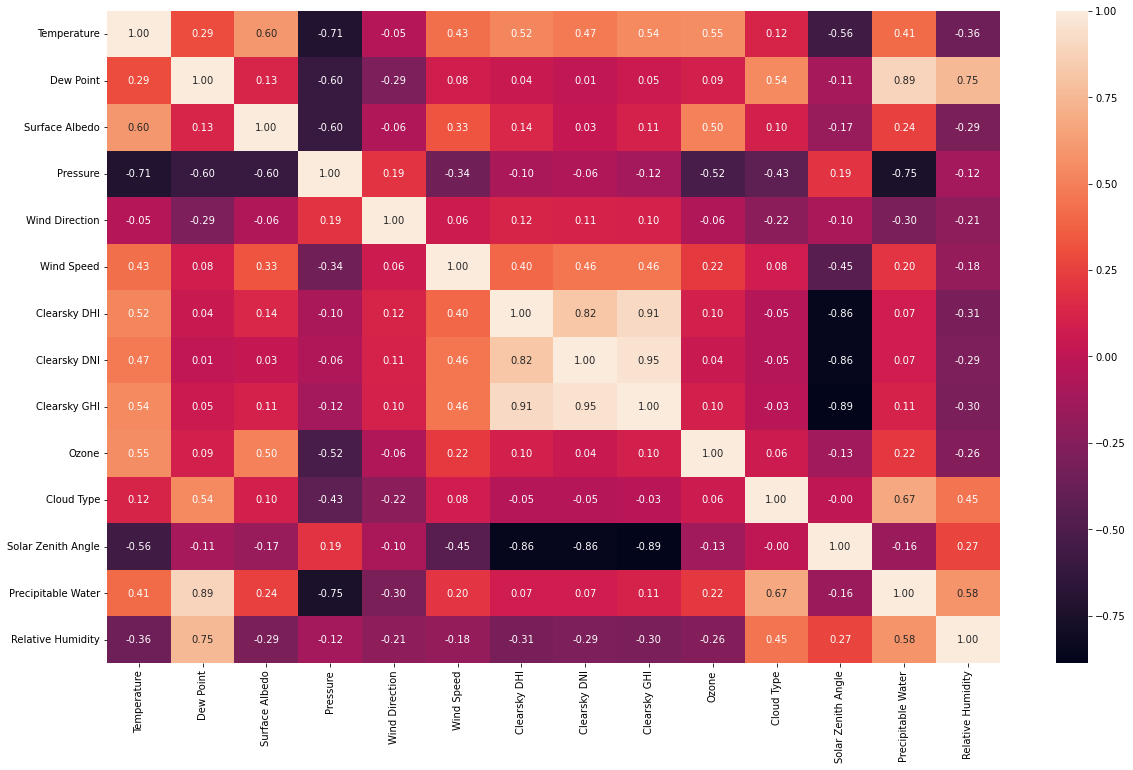

In [33]:
corr = df_train_data.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr, annot=True,fmt='.2f')
plt.show()

In [16]:
X = df_train_data[['Temperature','Dew Point', 'Surface Albedo', 'Pressure', 'Wind Direction', 
                  'Wind Speed', 'Ozone', 'Cloud Type', 'Solar Zenith Angle', 'Precipitable Water',
                  'Relative Humidity']].copy()

In [17]:
y = df_train_data[['Clearsky DHI','Clearsky DNI','Clearsky GHI']].copy()

In [18]:
X

Temperature  Dew Point  Surface Albedo  Pressure  Wind Direction  \
0              12.5        6.9            0.21      1005             121   
1              12.3        6.9            0.21      1005             122   
2              12.1        6.9            0.21      1005             124   
3              12.0        6.9            0.21      1005             125   
4              11.8        6.9            0.21      1005             126   
...             ...        ...             ...       ...             ...   
210235          6.9        5.8            0.21      1009              54   
210236          6.8        5.8            0.21      1009              54   
210237          6.8        5.8            0.21      1009              55   
210238          6.8        5.6            0.21      1009              55   
210239          6.8        5.6            0.21      1009              56   

        Wind Speed  Ozone  Cloud Type  Solar Zenith Angle  Precipitable Water  \
0              1.0  0.258           1              173.92                 1.4   
1              1.0  0.258           1              171.79                 1.3   
2              1.0  0.258           1              169.59                 1.3   
3              1.0  0.258           1              167.37                 1.3   
4              1.0  0.258           1              165.13                 1.3   
...            ...    ...         ...                 ...                 ...   
210235         1.2  0.279           4              173.77                 1.8   
210236         1.2  0.279           7              175.77                 1.8   
210237         1.1  0.279           7              177.31                 1.8   
210238         1.1  0.279           7              177.36                 1.8   
210239         1.1  0.280           7              175.87                 1.8   

        Relative Humidity  
0                   68.82  
1                   69.73  
2                   70.65  
3                   71.11  
4                   71.91  
...                   ...  
210235              92.63  
210236              93.26  
210237              93.26  
210238              91.95  
210239              91.95  

[210240 rows x 11 columns]

In [19]:
y

Clearsky DHI  Clearsky DNI  Clearsky GHI
0                  0             0             0
1                  0             0             0
2                  0             0             0
3                  0             0             0
4                  0             0             0
...              ...           ...           ...
210235             0             0             0
210236             0             0             0
210237             0             0             0
210238             0             0             0
210239             0             0             0

[210240 rows x 3 columns]

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)

In [21]:
pd.DataFrame(X)

0         1         2         3         4         5         6   \
0      -1.654736 -0.639757 -0.077711  1.126897 -0.866946 -0.768264 -0.691749   
1      -1.677886 -0.639757 -0.077711  1.126897 -0.857105 -0.768264 -0.691749   
2      -1.701037 -0.639757 -0.077711  1.126897 -0.837423 -0.768264 -0.691749   
3      -1.712612 -0.639757 -0.077711  1.126897 -0.827582 -0.768264 -0.691749   
4      -1.735762 -0.639757 -0.077711  1.126897 -0.817741 -0.768264 -0.691749   
...          ...       ...       ...       ...       ...       ...       ...   
210235 -2.302948 -0.747233 -0.077711  1.680392 -1.526292 -0.600893  0.651687   
210236 -2.314523 -0.747233 -0.077711  1.680392 -1.526292 -0.600893  0.651687   
210237 -2.314523 -0.747233 -0.077711  1.680392 -1.516451 -0.684578  0.651687   
210238 -2.314523 -0.766774 -0.077711  1.680392 -1.516451 -0.684578  0.651687   
210239 -2.314523 -0.766774 -0.077711  1.680392 -1.506610 -0.684578  0.715660   

              7         8         9         10  
0      -0.489276  1.964277 -0.874280  0.520520  
1      -0.489276  1.914572 -0.918490  0.551167  
2      -0.489276  1.863233 -0.918490  0.582152  
3      -0.489276  1.811427 -0.918490  0.597644  
4      -0.489276  1.759155 -0.918490  0.624586  
...          ...       ...       ...       ...  
210235  0.480481  1.960777 -0.697442  1.322405  
210236  1.450239  2.007448 -0.697442  1.343622  
210237  1.450239  2.043386 -0.697442  1.343622  
210238  1.450239  2.044552 -0.697442  1.299504  
210239  1.450239  2.009782 -0.697442  1.299504  

[210240 rows x 11 columns]

In [22]:
input_features = X
output_features = y

In [23]:
input_features

array([[-1.65473565, -0.63975669, -0.0777113 , ...,  1.96427707,
        -0.87428043,  0.5205199 ],
       [-1.6778861 , -0.63975669, -0.0777113 , ...,  1.91457172,
        -0.91848999,  0.55116734],
       [-1.70103655, -0.63975669, -0.0777113 , ...,  1.86323286,
        -0.91848999,  0.58215155],
       ...,
       [-2.31452344, -0.74723276, -0.0777113 , ...,  2.04338558,
        -0.69744219,  1.34362234],
       [-2.31452344, -0.76677387, -0.0777113 , ...,  2.04455237,
        -0.69744219,  1.29950351],
       [-2.31452344, -0.76677387, -0.0777113 , ...,  2.00978197,
        -0.69744219,  1.29950351]])

In [169]:
train_X, test_X, train_y, test_y = train_test_split(input_features,
                                 output_features,test_size=0.3, random_state = 42)

In [170]:
train_X.shape

(147168, 11)

In [171]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense,Activation,Dropout,MaxPool2D,Flatten,Conv2D
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adagrad

In [172]:
def model(X_train, y_train, n_steps, n_features, epochs, batch_size):
#     X_train = X_train.reshape(-1, n_steps,11)
    model = Sequential()
    model.add(layers.LSTM(11, activation = 'relu',
                        input_shape = (n_steps, n_features),
                        return_sequences = True ))
    model.add(layers.LSTM(5, activation = 'relu'))
    model.add(layers.Dense(3))
    model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])
    print(model.summary())
    
    print(X_train.shape)
    print(y_train.shape)

    
    history = model.fit(X_train, y_train, epochs=epochs, batch_size = batch_size, verbose = 10)
    
    IPython.display.clear_output()
    
    return model, history

In [173]:
import IPython

In [175]:
train_X = np.reshape(train_X,(-1,1,11))

model(train_X, train_y, 1 , 11, 15, 80)

(<keras.engine.sequential.Sequential at 0x2e191063d00>,
 <keras.callbacks.History at 0x2e195fdcc10>)

In [86]:
from tensorflow.keras.layers import LSTM

In [123]:
model = Sequential()
model.add(LSTM(100, input_shape=(1,11), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(200))
model.add(Dropout(0.2))
model.add(Dense(3, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_61 (LSTM)              (None, 1, 100)            44800     
                                                                 
 dropout_14 (Dropout)        (None, 1, 100)            0         
                                                                 
 lstm_62 (LSTM)              (None, 200)               240800    
                                                                 
 dropout_15 (Dropout)        (None, 200)               0         
                                                                 
 dense_29 (Dense)            (None, 3)                 603       
                                                                 
Total params: 286,203
Trainable params: 286,203
Non-trainable params: 0
_________________________________________________________________


In [155]:
batch_size = 100
epochs = 5

In [125]:
train_X = np.reshape(train_X,(-1,1,11))

In [137]:
model.fit(train_X,train_y,
          batch_size=batch_size, epochs=epochs)

AttributeError: 'function' object has no attribute 'fit'

In [104]:
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y,train_size=0.8, random_state = 84)

In [106]:
print(train_X.shape[0])
print(val_X.shape[0])
print(test_X.shape[0])

117734
29434
63072


In [104]:
pip install optuna

In [103]:
import optuna
import xgboost as xgb

from sklearn.metrics import r2_score

ModuleNotFoundError: No module named 'optuna'

In [ ]:
dtrain = xgb
dval
dtest

In [97]:
pd.DataFrame(train_X)

0         1         2         3         4         5         6   \
0       0.139424  1.343665 -0.077711 -1.225458 -1.349154  1.742299  0.523741   
1      -0.948647  0.063723 -0.556439  1.542018 -1.378677 -0.851949 -1.331480   
2       2.060911 -0.952414  1.358472 -1.087084  0.067948 -0.684578  0.843606   
3      -0.254133  1.089631 -1.513895 -0.810336 -0.552034 -0.266151  0.011955   
4       1.100168  0.640186  1.837200 -0.810336  0.737134  0.068591  1.163472   
...          ...       ...       ...       ...       ...       ...       ...   
147163  1.424274 -0.219623  1.358472  0.019906  0.914272 -0.098780  1.483338   
147164 -1.816789 -1.157596 -1.035167  1.265270  0.648566 -0.600893 -1.523400   
147165  0.232026  1.128713  1.358472 -1.363831  0.186039  0.487018  0.907579   
147166 -0.439337  0.591333 -0.556439  0.296654  0.333654 -0.768264 -0.371883   
147167  0.498256 -0.356411  0.879744 -0.395215 -1.388518 -0.600893  1.547311   

              7         8         9         10  
0       1.450239 -0.374908  1.424617  1.414347  
1      -0.812529 -0.307001 -0.697442  0.733368  
2      -0.812529 -1.007309 -0.432185 -1.511641  
3      -0.166024  0.795151  1.513036  1.570615  
4       0.157229 -0.917233  0.496216 -0.495897  
...          ...       ...       ...       ...  
147163 -0.812529 -1.699451 -0.122718 -1.161721  
147164  0.157229  1.209362 -0.830071 -0.046626  
147165  1.450239  0.057739  1.203569  0.897045  
147166 -0.812529  1.492893 -0.166927  0.917253  
147167 -0.812529  1.103418 -0.432185 -0.891956  

[147168 rows x 11 columns]

In [95]:
test_X

array([[-1.13385055, -0.61044503, -0.55643917, ...,  0.97250365,
        -1.05111867, -0.0301235 ],
       [-0.25413349,  1.08963103, -1.03516704, ...,  0.1275127 ,
         1.33619757,  1.5638797 ],
       [-0.30043439, -0.23916405, -1.03516704, ..., -0.91583293,
        -0.52060395, -0.33659781],
       ...,
       [-0.13838125,  1.06031938,  1.3584723 , ...,  0.21642227,
         0.89410197,  1.32307846],
       [ 1.16961912,  1.02123717,  0.87974443, ..., -0.69647599,
         1.60145493, -0.20087348],
       [ 0.56770744,  0.52293901,  1.83720017, ...,  0.92373173,
         0.05412033, -0.23286805]])

In [48]:
model = RandomForestRegressor()

In [49]:
model.fit(train_X, train_y)

# Predict the temperature using the testing data
y_pred = model.predict(val_X)

In [50]:
mse = mean_squared_error(val_y, y_pred)
print("MSE:", mse)

MSE: 605.6454793244253


In [45]:
y_pred = dt_model.predict(val_X)

In [46]:
mse = mean_squared_error(val_y, y_pred)
print("MSE:", mse)

MSE: 2582.0342782851344
